# Cinématica Plana - Cálculo del Centro Instántaneo de Rotación  (CIR)

Calculo génerico del CIR dadas las velocidades de dos puntos de un cuerpo

## background

La velocidad de cualquier punto en un **CR** puede calcularse conocido el **CIR** y la velocidad angular $\omega$ respecto del mismo.

$$ \mathbf{v} = \boldsymbol{\omega} \times \mathbf{r}_{CIR}$$

En consecuencia, la intersección dada por rectas correspondientes a las perpendiculares de las velocidades se corresponde con el lugar geometrico del **CIR**.

En forma parametrica, las lineas ($L_1, L2$) las podemos escribir según:

$$L_1 = P_1 + a V^{*}_1$$
$$L_2 = P_2 + b V^{*}_2$$

siendo $P_1$ y $P_2$ dos puntos donde la velocidad es conocida así como $V^{*}_1$ y $V^{*}_2$ dos vectores perpendiculares a las velocidades $V_1$ y $V_2$, respectivamente. Notar que $a$ y $b$ son dos parámetros arbitrarios ($a,b \in \Re$) que mapean la rectas en el espacio Euclediano. 

Luego, el **CIR** se encuentra en la intersección

$$L_1 = L_2 $$
$$P_1 + a V^*_1 = P_2 + b V^*_2 $$

Aplicando el producto vectorial, es fácil resolver para $a$

$$ |a| = \frac{\|(P_2 - P_1) \times V^*_2 \|}{\| V^*_1 \times V^*_2 \|}$$


*Calcular el signo de $a$ requiere un truco*

Luego, el **CIR** se encuentra en 

$$\textbf{CIR} = P_1 + a V^*_1 $$


### Implementación en  Python

In [1]:
# define puntos y velocidades como arrays en numpy. 
import numpy as np

P1 = np.array([0,1])
P2 = np.array([1,0])
V1 = np.array([-0.5, 1])
V2 = np.array([-1, 0.5])

In [2]:
# precomputa algunas magnitudes (útil para su implementación en WM)
p2p1 = P2 - P1

# calcula perpendiculares
V1_ = np.empty(2)
V2_ = np.empty(2)

# 'compute' orthogonal vectors to velocities V1 and V2.
V1_[0] = -V1[1]
V1_[1] = V1[0]
V2_[0] = -V2[1]
V2_[1] = V2[0]

cross1 = np.cross(p2p1,V2_)
cross2 = np.cross(V1_,V2_)

a = cross1 / cross2

CIR = P1 + a * V1_

print('a = %.2f' % a)
print('CIR: x = %.2f, y = %.2f' % (CIR[0],CIR[1]))

a = -2.00
CIR: x = 2.00, y = 2.00


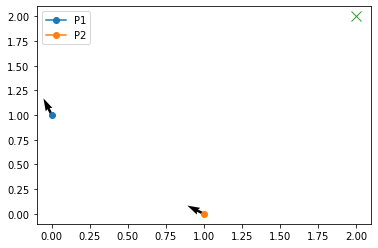

In [4]:
import matplotlib.pyplot as plt

# list attributes
P = [P1,P2]
V = [V1,V2]
V_ = [V1_, V2_]

#plt(P1[0],P1[1])
fig = plt.figure()
ax  = plt.subplot(111)
for i,(pi,vi) in enumerate(zip(P,V)):
    ax.plot(pi[0],pi[1], marker='o',label='P'+str(i+1))
    ax.quiver(pi[0],pi[1],vi[0],vi[1],scale=None)

# intersection lines plot only works in matplotlib 3.3.0+
#plt.axline((P1[0],P1[1]), slope=V1_[1]/V1_[0], color="black", linestyle=(0, (5, 5)))
#plt.axline((P2[0],P2[1]), slope=V2_[1]/V2_[0], color="black", linestyle=(0, (5, 5)))
ax.plot(CIR[0],CIR[1], marker='x',markersize=10)

ax.legend()
plt.show()


## Implementación en Working Model (WM)

La implementación en *WM* del cálculo del **CIR** se puede realizar con el procedimiento descripto arriba por intemedio de scripts dentro del entorno de *WM*. 


In [10]:
# Playing with python and strings. 
# Here, I will define variables as strings and then propagate overall expresssions (as complex as I want.)
# to not get messy during the process.

gOut = 'output[10]'
P1   = 'Point[6].p'
P2   = 'Point[7].p'
v1   = 'Point[6].v'
v2   = 'Point[7].v'

# function vector(x,y) returns a vector from x,y numbers.
v1_  = f'vector(-{v1}.y, {v1}.x)'   # orthogonal to v1 
v2_  = f'vector(-{v2}.y, {v2}.x)'   # orthogonal to v2

# function cross(a,b) ruturns the z-th component (as a number) of the cross product (a x b).
cross1 = f'cross({P2} - {P1},{v2_})'
cross2 = f'cross({v1_},{v2_})'

# computes 'a' (see 'background' notes)
a = f'{cross1}/{cross2}'

# computes CIR
CIR_x = f'{P1}.x + {a} * {v1_}.x'
CIR_y = f'{P1}.y + {a} * {v1_}.y'


print(f'CIR_x = {CIR_x}')
print(f'CIR_y = {CIR_y}')


# v1_x = f'{gOut}.y1'
# v1_y = f'{gOut}.y2'
# v2_x = f'{gOut}.y3'
# v2_y = f'{gOut}.y4'

# v1_vec = f'vector({v1_x}, {v1_y})'
# v2_vec = f'vector({v2_x}, {v2_y})'


# cross1 = f'cross({P2} - {P1}, {v2_vec})'

# cross2 = f'cross({v1_vec}, {v2_vec})'

# a      = f'({cross1})/({cross2})'

# OK, now variable 'a' it is store as output[11].y3 and output[11].y4. Right now, they return the same value.
# a_WM = 'output[11].y3'   # This value must be hardcoded from the user side.
# CIR_x = f'{P1}.x + {a_WM} * {v1_x}'
# CIR_y = f'{P1}.y + {a_WM} * {v1_y}'

# print(f'cross1 = {cross1}')
# print(f'cross2 = {cross2}')
# print(f'a = {a}')
# print(f'CIR_x = {CIR_x}')
# print(f'CIR_y = {CIR_y}')

CIR_x = Point[6].p.x + cross(Point[7].p - Point[6].p,vector(-Point[7].v.y, Point[7].v.x))/cross(vector(-Point[6].v.y, Point[6].v.x),vector(-Point[7].v.y, Point[7].v.x)) * vector(-Point[6].v.y, Point[6].v.x).x
CIR_y = Point[6].p.y + cross(Point[7].p - Point[6].p,vector(-Point[7].v.y, Point[7].v.x))/cross(vector(-Point[6].v.y, Point[6].v.x),vector(-Point[7].v.y, Point[7].v.x)) * vector(-Point[6].v.y, Point[6].v.x).y
